In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
x = np.random.randint(60, 100, 100)
np.sort(x)

array([60, 61, 61, 63, 63, 64, 64, 64, 64, 64, 65, 65, 66, 66, 66, 66, 67,
       68, 68, 68, 69, 70, 70, 70, 71, 72, 72, 72, 73, 73, 73, 73, 73, 74,
       74, 74, 74, 74, 75, 75, 75, 75, 77, 77, 77, 78, 78, 79, 79, 79, 80,
       80, 81, 81, 81, 82, 82, 82, 82, 83, 84, 84, 84, 85, 85, 85, 86, 87,
       87, 87, 87, 88, 89, 90, 91, 91, 92, 93, 93, 93, 93, 94, 94, 94, 94,
       95, 95, 95, 95, 96, 96, 96, 96, 97, 98, 98, 98, 98, 99, 99])

In [3]:
x.min()

60

In [4]:
x.max()

99

-----------
# Momentumes

## 1) First Momentumes
**Indicates concentration points (center) of data (Where is the data approximately located?)**<br/>
**Obstacle of mean: Sensitivity to noise and outliers**

**1-1) Mean (arithmatic mean)**

In [5]:
mean = np.mean(x)
mean

80.13

**1-2) Trimmed Mean**

In [6]:
x = np.append(x, [40, 300])
mean = np.mean(x)
mean

81.8921568627451

In [7]:
trimmed_mean = st.trim_mean(x, 0.1)
trimmed_mean

80.1219512195122

**1-3) Median**

In [8]:
median = np.median(x)
median

79.5

**1-4) Mode**

In [9]:
mode = st.mode(x)#, keepdims=False)
mode

ModeResult(mode=array([64]), count=array([5]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


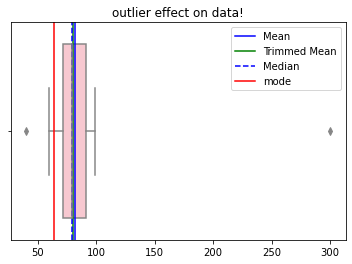

In [10]:
sns.boxplot(x, color='pink', orient='h')
# plt.hist(x)

plt.axvline(x=mean, linestyle='-',  color='b',label='Mean')
plt.axvline(x=trimmed_mean, linestyle='-',  color='g',label='Trimmed Mean')
plt.axvline(x=median, linestyle='--', color='b',label='Median')
plt.axvline(x=mode[0], color='r', label='mode')
plt.title("outlier effect on data!")

plt.legend()

In [11]:
x = np.delete(x, np.where(x == x.max()))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


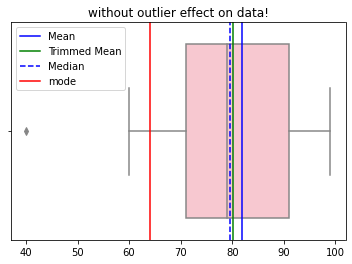

In [12]:
sns.boxplot(x, color='pink', orient='h')
# plt.hist(x)

plt.axvline(x=mean, linestyle='-',  color='b',label='Mean')
plt.axvline(x=trimmed_mean, linestyle='-',  color='g',label='Trimmed Mean')
plt.axvline(x=median, linestyle='--', color='b',label='Median')
plt.axvline(x=mode[0], color='r', label='mode')
plt.title("without outlier effect on data!")

plt.legend()

----------------
## 2) Second Momentumes


### 2-1) Variance
The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set. Variance is often depicted by this symbol: σ2.<br/>

https://www.investopedia.com/terms/v/variance.asp#:~:text=The%20term%20variance%20refers%20to,by%20this%20symbol%3A%20%CF%832.


\begin{equation}
\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n -1} \\
\sigma^2	=	\text{sample variance}\\
x_i	=	\text{the value of the one observation} \\
{\mu}	=	\text{the mean value of all observations} \\
n	=	\text{the number of observations}\\
\end{equation}

**Obstacle: the variance can not interprete as unit measure because, it is not same type as data, and only can show as a measure of how variation is big**

In [15]:
np.var(x)

142.2750710714636

In [25]:
x = np.append(x, [40, 300])
np.var(x)

633.2136649408284

In [26]:
x = np.delete(x, np.where(x == x.max()))

**2-2) Standard Deviation**<br/>
**Used interprate dispersal, as a measure unit. eg: data has scattered <u><i>n</i></u> unit from center of data**




\begin{equation}
\sigma = \sqrt{\frac{\displaystyle\sum(x_i - \mu)^2} {N}} \\
\sigma	=	\text{population standard deviation}\\
x_i	=	\text{each value from the population} \\
{\mu}	=	\text{the population mean} \\
n	=	\text{the size of the population}\\
\end{equation}

In [27]:
np.std(x)

13.021954821781788

--------------
# Histogram

In [32]:
counts = np.array(np.unique(x, return_counts=True))
frequency = pd.DataFrame(counts.T, columns=['Event', 'Occurance'])
frequency.sort_values(['Occurance'], ascending=False)[:10]

,Event,Occurance
4,64,5
13,73,5
14,74,5
21,82,4
37,98,4
35,96,4
34,95,4
6,66,4
33,94,4
32,93,4


In [33]:
mode

ModeResult(mode=array([64]), count=array([5]))

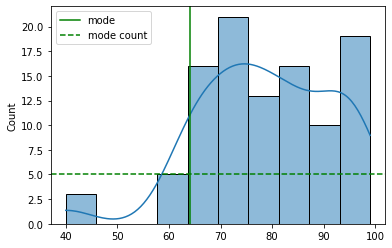

In [57]:
sns.histplot(x, bins=10, kde=True)
plt.axvline(x=mode[0], color='green', label='mode')
plt.axhline(y=mode[1], linestyle='--' , color='green', label='mode count')
# plt.ylim(top=10)
plt.legend()

----------------
## 3) Third Momentumes

### 3-1) Skewness
Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. in other word Skewness is a statistical measure that is used to show whether a distribution is distorted or asymmetrical.

https://www.investopedia.com/terms/s/skewness.asp#:~:text=Skewness%20is%20a%20statistical%20measure,values%20are%20more%20than%20zero.

### Skewness types:
#### 1- Symetric: Mode = Median = Mean (Calculated value = 0)
 
#### 2- Positive (Right) Skewness: Mode < Median < Mean

#### 3- Negative (Left) Skewness: Mode > Median > Mean

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png">
[image from wikipedia]

In [55]:
st.skew(x)

-0.5457239000855915

----------------
## 4) Fourth Momentumes

**4-1) Kurtousis**

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.

* 1- Distributions with **medium** kurtosis (medium tails) are **mesokurtic.**
* 2- Distributions with **low** kurtosis (thin tails) are **platykurtic.**
* 3- Distributions with **high** kurtosis (fat tails) are **leptokurtic.**

**Tails** are the tapering ends on either side of a distribution. They represent the probability or frequency of values that are extremely high or low compared to the mean. In other words, tails **represent how often outliers occur.**



<img src="https://www.scribbr.com/wp-content/uploads/2022/07/The-difference-between-skewness-and-kurtosis.webp">
[image from scribbr.com]


https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(medium%20tails)%20are%20mesokurtic.

In [58]:
st.kurtosis(x)

0.3689417272990858

-----------
# Correlation

------------
### Description:
<p>
year: Year.<br/>
month: Month.<br/>
day: Day.<br/>
dep_time: Departure time, in Eastern time zone.<br/>
dep_delay: Departure delay, in minutes.<br/>
arr_time: Arrival time, in the local time zone.<br/>
arr_delay: Arrival delay, in minutes.<br/>
carrier: Carrier, abbreviated.<br/>
tailnum: Tail number of the airplane.<br/>
flight: Flight number.<br/>
origin: Flight origin, airport code.<br/>
dest: Flight destination, airport code.<br/>
air_time: Time in the air, in minutes.<br/>
distance: Distance between the departure and arrival airports, in miles.<br/>
hour: Scheduled departure hour.<br/>
minute: Scheduled departure minute.<br/>
</p>

---------------

In [35]:
df = pd.read_csv('../../Datasets/general/nycflights.csv')

In [36]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [37]:
df['year'].value_counts()

2013    336776
Name: year, dtype: int64

In [38]:
df.drop(columns=['year', 'flight'], axis=1, inplace=True)

In [39]:
df.corr()# numeric_only=True)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance,hour,minute
month,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,0.010924,0.021636,-0.005227,0.015528
day,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,0.002236,0.003041,-0.000055,0.000987
dep_time,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,-0.015532,-0.017995,0.999148,0.082960
dep_delay,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.078918,0.068726,0.783283,0.050321
arr_delay,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,-0.035297,-0.061868,0.173456,0.021522
air_time,0.010924,0.002236,-0.014619,-0.015532,-0.022405,0.054296,0.078918,-0.035297,1.000000,0.990650,-0.016277,0.017032
distance,0.021636,0.003041,-0.013998,-0.017995,-0.021671,0.046991,0.068726,-0.061868,0.990650,1.000000,-0.018860,0.019780


<AxesSubplot:>

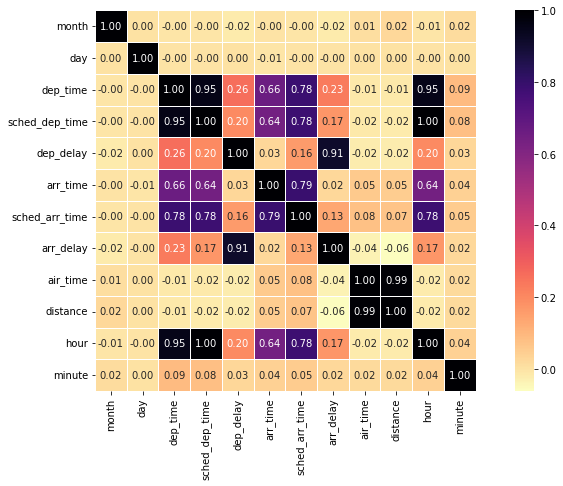

In [40]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),#numeric_only=True),
            cmap='magma_r',
            linewidths=0.7,
            square=True, annot=True, fmt='.2f')